# **Project 2**, APS1070 Summer 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Jun 25, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Jashwant Raj Gunaseelan
*   Student Number: 1007923712

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.1]**

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e5dd32f57645693ea4deedcf6b22eefe6c5cabaa29d782182bad580e9ff7b1f2
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(f"The number of rows are equal to {len(df.index)}")
print("There are 3 more features other than the 28 main features. These features are Time,Amount and Class")
print(f"The target column is the Class as it has values {set(df['Class'])} 0 for non_fraudulent and 1 for fraudulent")
print("The target column in this case Class helps us determine if the transaction is valid or invalid")

The number of rows are equal to 284807
There are 3 more features other than the 28 main features. These features are Time,Amount and Class
The target column is the Class as it has values {0, 1} 0 for non_fraudulent and 1 for fraudulent
The target column in this case Class helps us determine if the transaction is valid or invalid


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases? _________ **[0.2]**


In [7]:
### YOUR CODE HERE ###
Total_Rows=len(df.index)
Class1=len(df.index[df['Class']==0])
Class2=len(df.index[df['Class']==1])
print(f"Class value 0 has {round((Class1/Total_Rows)*100,2)}% entries and Class value 1 has {round((Class2/Total_Rows)*100,2)}% entries")
print("The data is not balanced as only few are entries belong to Class 1 where as most belong to Class 0")

Class value 0 has 99.83% entries and Class value 1 has 0.17% entries
The data is not balanced as only few are entries belong to Class 1 where as most belong to Class 0


3) Balance of data is important as it can help the model differentiate better.
Imbalanced data can predict the data incorrectly. In our previous project we worked with supervised data that had a fair number of information for all classes. Hence training would be much efficient also we made use of supervised learning algorithm like KNN. In this case while we make a train test split if we get more of class '0' data for train and then let the model predict it might have really bad accuracy as it might predict a particular Class '1' as Class'0'.

4)We must use unsupervised learning, creating clusters. Clustering of common data and trying to find the ones that are far from the main cluster. 

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [8]:
df.iloc[:,:30]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [9]:
### Split the data  ###
from sklearn.model_selection import train_test_split
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
Split_ratio_Test=0.15
Split_ratio_validation=0.20
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:30],df.iloc[:,30],test_size=Split_ratio_Test,random_state=40)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=Split_ratio_validation,random_state=40)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

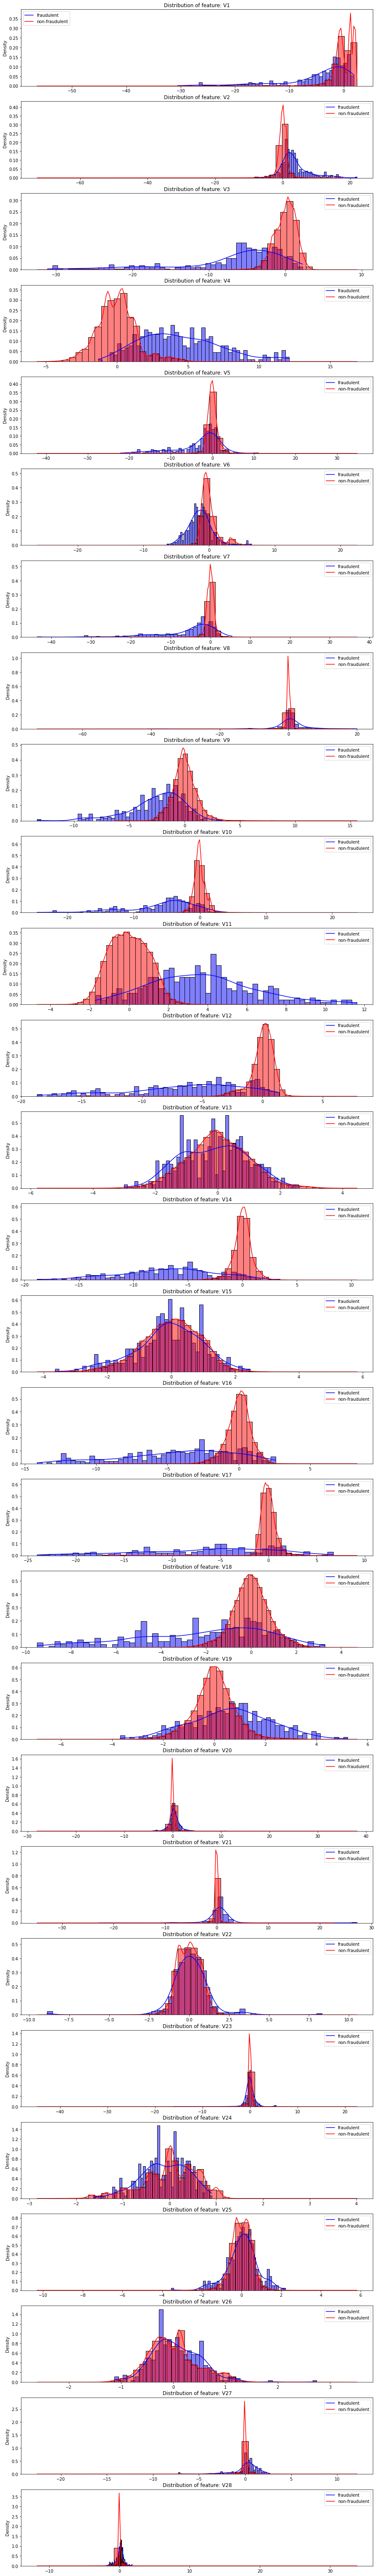

In [10]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**The graphs are plotted for the features V1-V28 of the credit card data set. They provide the probability density function. They provide the range where the data is close to the mean. Each V feature has a different mean and variance value and we are going to see which features help us best differentiate fraudulemt and non-fraudulent transactions**

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**


# ---------------------------------------2A-----------------------------------

In [11]:
### YOUR CODE HERE ###
#Part2a#
#Finding area under curve AUC#
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import pandas as pd


AUC_train=[]
AUC_validation=[]
score_sample_value={}

Single_comp=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
for Value in features:
  Single_comp.fit(X_train[Value].values.reshape(-1,1))
  #Calculating train scores for the Gaussian Mixture for 1 component
  scores_train=Single_comp.score_samples(X_train[Value].values.reshape(-1,1))
  #Calculating validation scores for the Gaussian Mixture for 1 component
  scores_validation=Single_comp.score_samples(X_val[Value].values.reshape(-1,1))
  score_sample_value[Value]=scores_validation

  #Calculating AUC for trainig dataset and validation dataset
  AUC_train.append(roc_auc_score(y_train,-1*scores_train))
  AUC_validation.append(roc_auc_score(y_val,-1*scores_validation))

df_SC=pd.DataFrame(features,columns=['Features'])
df_SC['AUC Train Data']=AUC_train
df_SC['AUC Validation Data']=AUC_validation

In [12]:
df_SC#Detailed list of all the AUC scores for both train and validation data

,Features,AUC Train Data,AUC Validation Data
0,V1,0.693713,0.715199
1,V2,0.842757,0.873816
2,V3,0.864496,0.875489
3,V4,0.889022,0.884920
4,V5,0.763703,0.774489
5,V6,0.730423,0.711320
6,V7,0.864986,0.892168
7,V8,0.775387,0.790610
8,V9,0.799129,0.794380
9,V10,0.908141,0.925411


In [13]:
top_three=df_SC.nlargest(n=3,columns=['AUC Validation Data']).index # Getting the row number of the top 3 values
df_SC.nlargest(n=3,columns=['AUC Validation Data'])# Getting the top 3 values for validation data.

,Features,AUC Train Data,AUC Validation Data
13,V14,0.945510,0.965535
16,V17,0.924202,0.943019
9,V10,0.908141,0.925411


In [14]:
# We try to find the threhold value for the top 3 values
from sklearn.metrics import f1_score,precision_score,recall_score
Final=[]
dic_thr={}
for top in top_three:
  f1_list,threshold=[],[]
  probabilities=list(score_sample_value[df_SC.iloc[top]['Features']])
  for i in range(0,len(probabilities),100):
    random_threshold=sorted(probabilities)[i]
    threshold.append(random_threshold)
    f1=f1_score(y_val,probabilities < random_threshold)
    f1_list.append(f1)
  thr1=threshold[f1_list.index(max(f1_list))]
  f1_list,threshold=[],[]
  dd=[thr1+x for x in range(-20,21)]
  for x in dd:
    threshold.append(x)
    f1=f1_score(y_val,probabilities < x)
    f1_list.append(f1)
  thr2=threshold[f1_list.index(max(f1_list))]
  dic_thr['Threshold_'+str(df_SC.iloc[top]['Features'])]=round(thr2,3)
  dic_thr["f1_"+str(df_SC.iloc[top]['Features'])]=round(max(f1_list),3)
  Final.append(dic_thr)
  dic_thr={}
print(Final)

[{'Threshold_V14': -19.042, 'f1_V14': 0.644}, {'Threshold_V17': -21.673, 'f1_V17': 0.61}, {'Threshold_V10': -11.539, 'f1_V10': 0.217}]


In [15]:
#precision, recall and f1 score for validation set and training set based on V values
Report=pd.DataFrame(columns=['Features','Threshold','Precision(Val)','Recall(Val)','F1(Val)','Precision(Train)','Recall(Train)','F1(Train)'])
for index,top in enumerate(top_three):
  #Validation Set
  precision_Val_1=precision_score(y_val,list(score_sample_value[df_SC.iloc[top]['Features']])<list(Final[index].values())[0])
  recall_Val_1=recall_score(y_val,list(score_sample_value[df_SC.iloc[top]['Features']])<list(Final[index].values())[0])
  f1_Val_1=f1_score(y_val,list(score_sample_value[df_SC.iloc[top]['Features']])<list(Final[index].values())[0])

  Single_comp.fit(X_train[df_SC.iloc[top]['Features']].values.reshape(-1,1))
  Train_scores_1=Single_comp.score_samples(X_train[df_SC.iloc[top]['Features']].values.reshape(-1,1))

  #Train set
  precision_Train_1=precision_score(y_train,Train_scores_1<list(Final[index].values())[0])
  recall_Train_1=recall_score(y_train,Train_scores_1<list(Final[index].values())[0])
  f1_Train_1=f1_score(y_train,Train_scores_1<list(Final[index].values())[0])
  #print([df_SC.iloc[top]['Features'],round(precision_Val_1,3),round(recall_Val_1,3),round(f1_Val_1,3),round(precision_Train_1,3),round(recall_Train_1,3),round(f1_Train_1,3)])
  Report_lenght=len(Report)
  Report.loc[Report_lenght]=[df_SC.iloc[top]['Features'],list(Final[index].values())[0],round(precision_Val_1,3),round(recall_Val_1,3),round(f1_Val_1,3),round(precision_Train_1,3),round(recall_Train_1,3),round(f1_Train_1,3)]

Report

,Features,Threshold,Precision(Val),Recall(Val),F1(Val),Precision(Train),Recall(Train),F1(Train)
0,V14,-19.042,0.659,0.629,0.644,0.578,0.567,0.572
1,V17,-21.673,0.723,0.528,0.610,0.648,0.496,0.562
2,V10,-11.539,0.144,0.438,0.217,0.119,0.421,0.185


## **According to the Big O notation the complexity of the algorithm can be given by `O(n(c+d))` where `n` is equal to 3 as we are calculating the top 3 threshold values and can change based on the requirements. The `c` is equal to size of the the scores calculated for the V values divided by the steps or how much space between the inputs i.e (total size of(score_samples)/steps), in this case V14,17,V10 and each had score sample have a definite size. `d` is always for a range of 41 values** 



---



#--------------------------------------2B-------------------------------------

In [16]:
AUC_all=df_SC.nlargest(n=3,columns=['AUC Validation Data'])
X_train_temp=X_train.copy()
X_train_temp['Class']=y_train.copy()
X_Train_non_fraudulent=X_train_temp[X_train_temp['Class']==0]
AUC_Train_S,Pre_Train_S,Rec_Train_S,F1_Train_S=[],[],[],[]
AUC_S,Pre_S,Rec_S,F1_S=[],[],[],[]
for index,top in enumerate(top_three):
  Single_comp.fit(X_Train_non_fraudulent[df_SC.iloc[top]['Features']].values.reshape(-1,1))
  scores_new=Single_comp.score_samples(X_train[df_SC.iloc[top]['Features']].values.reshape(-1,1))
  scores_Val_new=Single_comp.score_samples(X_val[df_SC.iloc[top]['Features']].values.reshape(-1,1))
  AUC_score=roc_auc_score(y_train,-1*scores_new)
  AUC_Train_S.append(AUC_score)
  AUC_score=roc_auc_score(y_val,-1*scores_Val_new)
  AUC_S.append(AUC_score)
  precision=precision_score(y_train,scores_new<Report.loc[index,'Threshold'])
  Pre_Train_S.append(precision)
  precision=precision_score(y_val,scores_Val_new<Report.loc[index,'Threshold'])
  Pre_S.append(precision)
  recall=recall_score(y_train,scores_new<Report.loc[index,'Threshold'])
  Rec_Train_S.append(recall)
  recall=recall_score(y_val,scores_Val_new<Report.loc[index,'Threshold'])
  Rec_S.append(recall)
  f1=f1_score(y_train,scores_new<Report.loc[index,'Threshold'])
  F1_Train_S.append(f1)
  f1=f1_score(y_val,scores_Val_new<Report.loc[index,'Threshold'])
  F1_S.append(f1)

Report_2=Report.copy()
Report_2['Precision_NF(Val)']=Pre_S
Report_2['Recall_NF(Val)']=Rec_S
Report_2['F1_NF(Val)']=F1_S
Report_2['Precision_Train_NF(Val)']=Pre_Train_S
Report_2['Recall_Train_NF(Val)']=Rec_Train_S
Report_2['F1_Train_NF(Val)']=F1_Train_S
Report_2['AUC_Validation_NF']=AUC_S
Report_2['AUC_Validation']=AUC_all['AUC Validation Data'].values
Report_2['AUC_Train_NF']=AUC_Train_S
Report_2['AUC_Train']=AUC_all['AUC Train Data'].values

In [17]:
Report_2

,Features,Threshold,Precision(Val),Recall(Val),F1(Val),Precision(Train),Recall(Train),F1(Train),Precision_NF(Val),Recall_NF(Val),F1_NF(Val),Precision_Train_NF(Val),Recall_Train_NF(Val),F1_Train_NF(Val),AUC_Validation_NF,AUC_Validation,AUC_Train_NF,AUC_Train
0,V14,-19.042,0.659,0.629,0.644,0.578,0.567,0.572,0.619565,0.640449,0.629834,0.550685,0.600000,0.574286,0.965521,0.965535,0.945753,0.945510
1,V17,-21.673,0.723,0.528,0.610,0.648,0.496,0.562,0.614458,0.573034,0.593023,0.579439,0.555224,0.567073,0.942635,0.943019,0.923659,0.924202
2,V10,-11.539,0.144,0.438,0.217,0.119,0.421,0.185,0.141892,0.471910,0.218182,0.116641,0.447761,0.185071,0.925463,0.925411,0.908262,0.908141


# **The results are similar as we have trained the model to detect the non fraudulent transations only in 2B and the number of fraudulent transactions are 0.17% of the total dataset. Considering that there are very less fraudulent data to train with, the scores won't deviate much.**

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




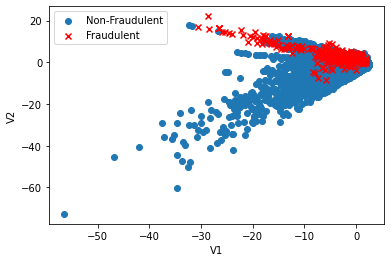

In [18]:
#Plotting the scatter plot for the first 2 features
X_train_plot=X_train.copy()
X_train_plot['Class']=y_train
plt.scatter(X_train_plot[X_train_plot['Class']==0]['V1'],X_train_plot[X_train_plot['Class']==0]['V2'])
plt.scatter(X_train_plot[X_train_plot['Class']==1]['V1'],X_train_plot[X_train_plot['Class']==1]['V2'],c='red',marker='x')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()

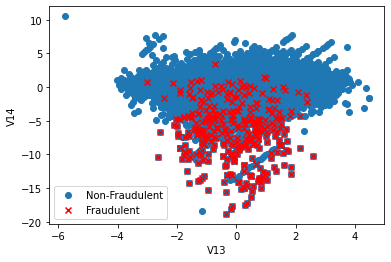

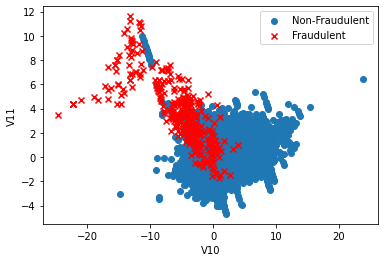

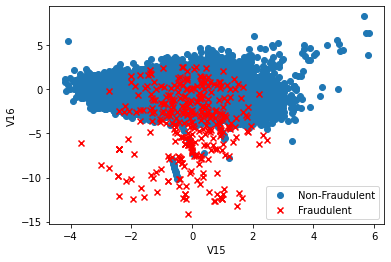

In [19]:
#Plotting the remaining three plots 
plt.scatter(X_train_plot['V13'],X_train_plot['V14'])
plt.scatter(X_train_plot[X_train_plot['Class']==1]['V13'],X_train_plot[X_train_plot['Class']==1]['V14'],c='red',marker='x')
plt.xlabel('V13')
plt.ylabel('V14')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.scatter(X_train_plot[X_train_plot['Class']==0]['V10'],X_train_plot[X_train_plot['Class']==0]['V11'])
plt.scatter(X_train_plot[X_train_plot['Class']==1]['V10'],X_train_plot[X_train_plot['Class']==1]['V11'],c='red',marker='x')
plt.xlabel('V10')
plt.ylabel('V11')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.scatter(X_train_plot[X_train_plot['Class']==0]['V15'],X_train_plot[X_train_plot['Class']==0]['V16'])
plt.scatter(X_train_plot[X_train_plot['Class']==1]['V15'],X_train_plot[X_train_plot['Class']==1]['V16'],c='red',marker='x')
plt.xlabel('V15')
plt.ylabel('V16')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()

As we can observe from the above 4 plots, there is one major cluster and points that are away from the cluster. So we take `n_component` value is 1

In [20]:
#Calculating the AUC score for the initial plot
AUC_T_score,AUC_V_score=[],[]
Predicted_comp=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
Predicted_comp.fit(X_train[['V1','V2']].values)
score_predicted_comp_T=Predicted_comp.score_samples(X_train[['V1','V2']].values)
score_Val_predicted_comp_T=Predicted_comp.score_samples(X_val[['V1','V2']].values)
AUC_Train_score_predicted=roc_auc_score(y_train,-1*score_predicted_comp_T)
AUC_T_score.append(AUC_Train_score_predicted)
AUC_Val_score_predicted=roc_auc_score(y_val,-1*score_Val_predicted_comp_T)
AUC_V_score.append(AUC_Val_score_predicted)
print(f'AUC train score is {AUC_T_score[0]} and AUC val score is {AUC_V_score[0]}')

AUC train score is 0.8457512214444631 and AUC val score is 0.8679738081908457


In [21]:
#Calculating the AUC score for the remaining values
pairs=[['V13','V14'],['V10','V11'],['V15','V16']]
for sel in pairs:
  Predicted_comp.fit(X_train[sel].values)
  score_predicted_comp_T=Predicted_comp.score_samples(X_train[sel].values)
  score_Val_predicted_comp_T=Predicted_comp.score_samples(X_val[sel].values)
  AUC_Train_score_predicted=roc_auc_score(y_train,-1*score_predicted_comp_T)
  AUC_T_score.append(AUC_Train_score_predicted)
  AUC_Val_score_predicted=roc_auc_score(y_val,-1*score_Val_predicted_comp_T)
  AUC_V_score.append(AUC_Val_score_predicted)
print(f'AUC train scores is {AUC_T_score[1:]} and AUC val scores is {AUC_V_score[1:]}')

AUC train scores is [0.944796091130677, 0.9259599341048788, 0.8856838070204598] and AUC val scores is [0.9669933358008662, 0.916118369047464, 0.9026074632334479]


In [22]:
Decision=pd.DataFrame(columns=['Pairs','AUC Train','AUC Val'])
Decision['Pairs']=[['V1','V2']]+pairs
Decision['AUC Train']=AUC_T_score
Decision['AUC Val']=AUC_V_score

In [23]:
Decision

,Pairs,AUC Train,AUC Val
0,"[V1, V2]",0.845751,0.867974
1,"[V13, V14]",0.944796,0.966993
2,"[V10, V11]",0.925960,0.916118
3,"[V15, V16]",0.885684,0.902607


In [24]:
Highest=Decision.nlargest(n=1,columns=['AUC Val'])
print('The highest AUC score is for',Highest['Pairs'].values[0])

The highest AUC score is for ['V13', 'V14']


In [25]:
# We try to find the threhold value for the top 3 values
from sklearn.metrics import f1_score,precision_score,recall_score
Final=[]
dic_thr={}
Score_Val=[]
Score_Train=[]
for xx in Decision['Pairs'].values:
  f1_list,threshold=[],[]
  Predicted_comp.fit(X_train[xx].values)
  score_Train_predicted_comp_T=Predicted_comp.score_samples(X_train[xx].values)
  score_Val_predicted_comp_T=Predicted_comp.score_samples(X_val[xx].values)
  Score_Train.append(score_Train_predicted_comp_T)
  Score_Val.append(score_Val_predicted_comp_T)
  for i in range(0,len(score_Val_predicted_comp_T),100):
    random_threshold=sorted(score_Val_predicted_comp_T)[i]
    threshold.append(random_threshold)
    f1=f1_score(y_val,score_Val_predicted_comp_T < random_threshold)
    f1_list.append(f1)
  thr1=threshold[f1_list.index(max(f1_list))]
  f1_list,threshold=[],[]
  dd=[thr1+x for x in range(-10,11)]
  for x in dd:
    threshold.append(x)
    f1=f1_score(y_val,score_Val_predicted_comp_T < x)
    f1_list.append(f1)
  thr2=threshold[f1_list.index(max(f1_list))]
  #print(thr2,max(f1_list))
  dic_thr['Threshold_'+str(xx)]=round(thr2,3)
  dic_thr["f1_"+str(xx)]=round(max(f1_list),3)
  Final.append(dic_thr)
  dic_thr={}
print(Final)

[{"Threshold_['V1', 'V2']": -45.541, "f1_['V1', 'V2']": 0.116}, {"Threshold_['V13', 'V14']": -19.057, "f1_['V13', 'V14']": 0.637}, {"Threshold_['V10', 'V11']": -17.378, "f1_['V10', 'V11']": 0.306}, {"Threshold_['V15', 'V16']": -12.75, "f1_['V15', 'V16']": 0.512}]


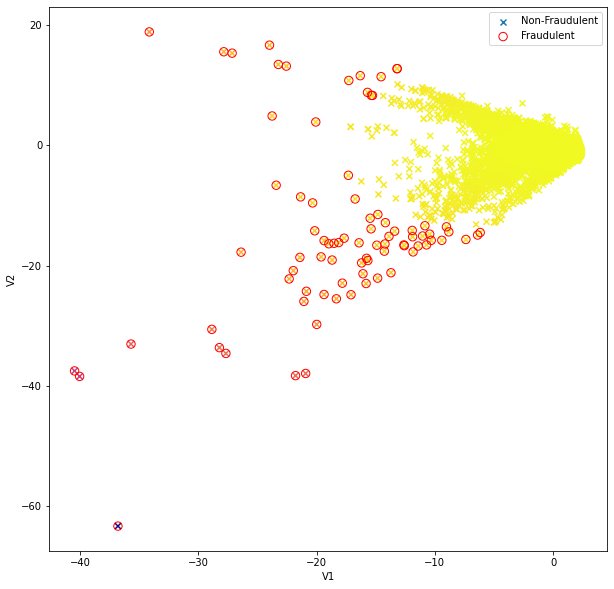

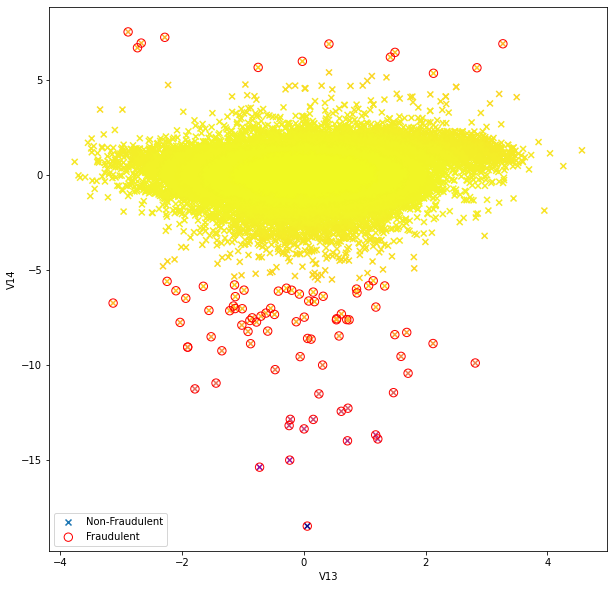

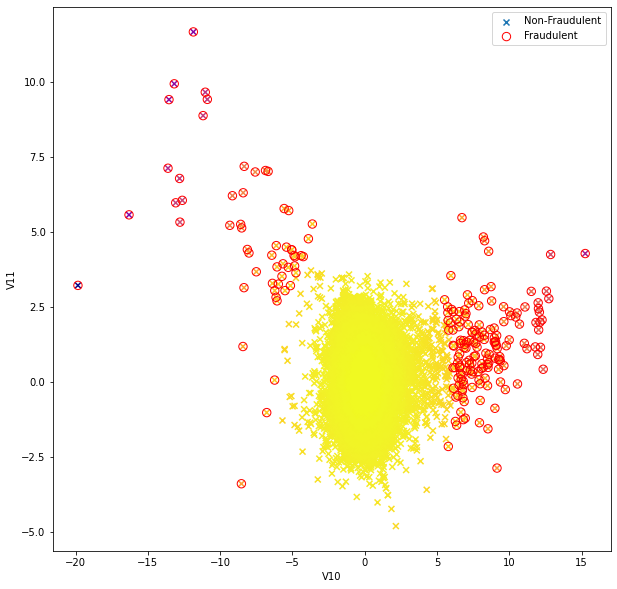

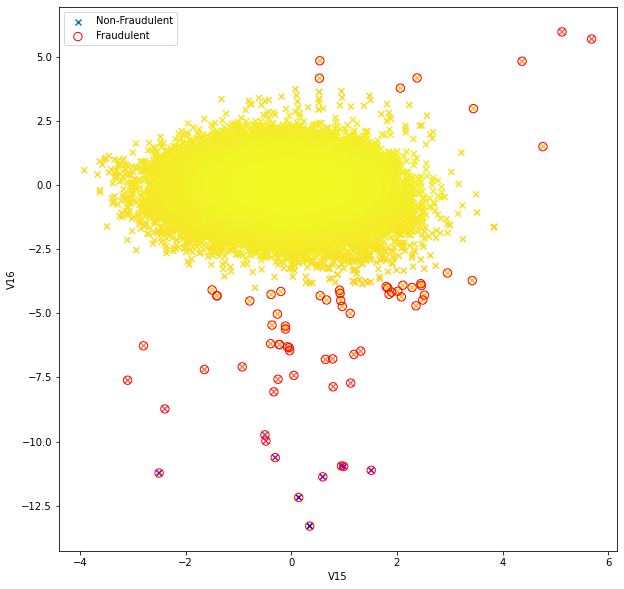

In [26]:
#The below plot is with respect to validation data
plt.figure(figsize=(10,10))
plt.scatter(X_val['V1'],X_val['V2'],c=Score_Val[0],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Val[0]<list(Final[0].values())[0])[0]
plt.scatter(X_val.iloc[outlier,1],X_val.iloc[outlier,2],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))   
plt.scatter(X_val['V13'],X_val['V14'],c=Score_Val[1],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Val[1]<list(Final[1].values())[0])[0]
plt.scatter(X_val.iloc[outlier,13],X_val.iloc[outlier,14],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V13')
plt.ylabel('V14')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_val['V10'],X_val['V11'],c=Score_Val[2],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Val[2]<list(Final[2].values())[0])[0]
plt.scatter(X_val.iloc[outlier,10],X_val.iloc[outlier,11],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V10')
plt.ylabel('V11')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_val['V15'],X_val['V16'],c=Score_Val[3],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Val[3]<list(Final[3].values())[0])[0]
plt.scatter(X_val.iloc[outlier,15],X_val.iloc[outlier,16],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V15')
plt.ylabel('V16')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()

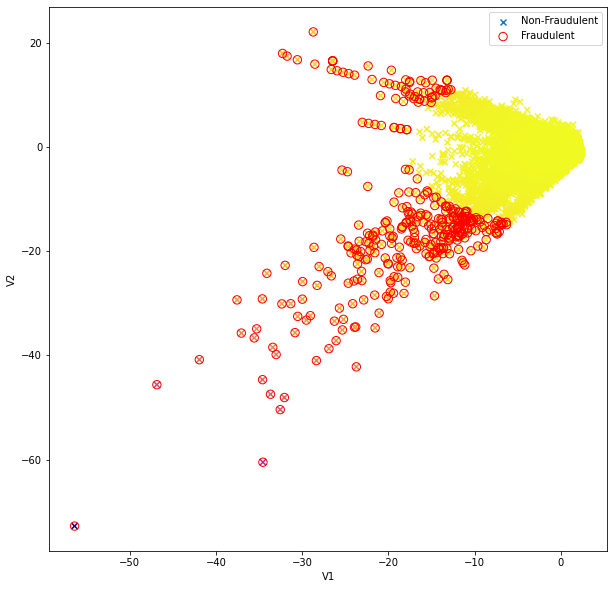

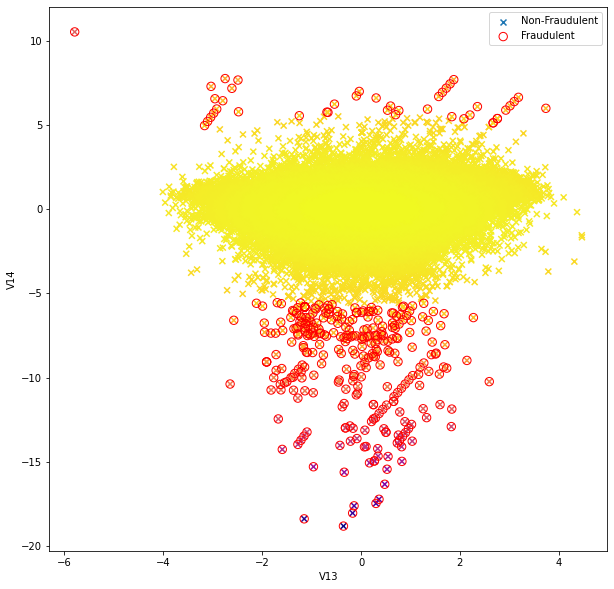

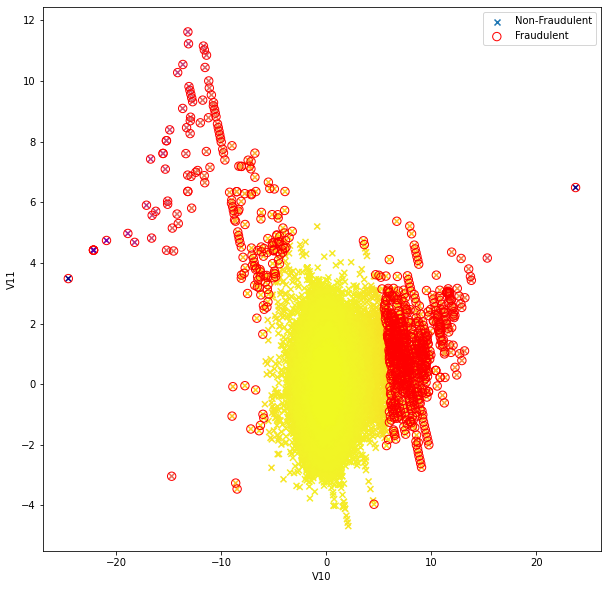

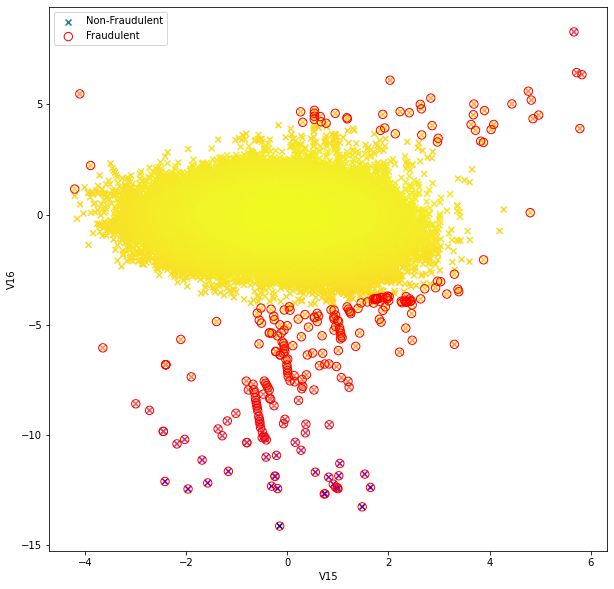

In [27]:
#The below plot is with respect to train data
plt.figure(figsize=(10,10))
plt.scatter(X_train_plot['V1'],X_train_plot['V2'],c=Score_Train[0],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Train[0]<list(Final[0].values())[0])[0]
plt.scatter(X_train_plot.iloc[outlier,1],X_train_plot.iloc[outlier,2],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_train_plot['V13'],X_train_plot['V14'],c=Score_Train[1],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Train[1]<list(Final[1].values())[0])[0]
plt.scatter(X_train_plot.iloc[outlier,13],X_train_plot.iloc[outlier,14],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V13')
plt.ylabel('V14')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_train_plot['V10'],X_train_plot['V11'],c=Score_Train[2],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Train[2]<list(Final[2].values())[0])[0]
plt.scatter(X_train_plot.iloc[outlier,10],X_train_plot.iloc[outlier,11],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V10')
plt.ylabel('V11')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_train_plot['V15'],X_train_plot['V16'],c=Score_Train[3],cmap='plasma',marker='x')
outlier=np.nonzero(Score_Train[3]<list(Final[3].values())[0])[0]
plt.scatter(X_train_plot.iloc[outlier,15],X_train_plot.iloc[outlier,16],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.xlabel('V15')
plt.ylabel('V16')
plt.legend(['Non-Fraudulent','Fraudulent'])
plt.show()

In [28]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


# When we observed the AUC calculated for the features chosen in Part 3a. We can see that the feature [V13,V14] provides high AUC scores for validation data.Hence we choose V13,V14,V15 for the 3D plot as well

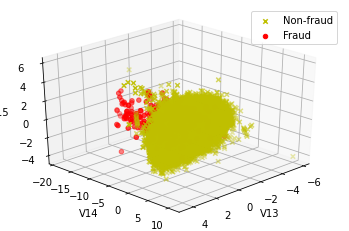

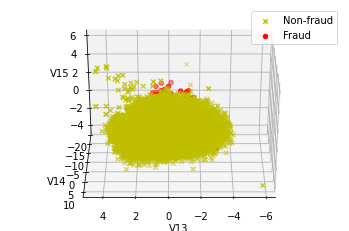

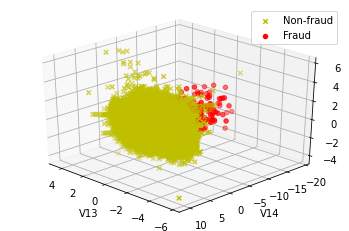

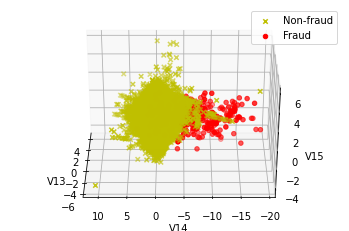

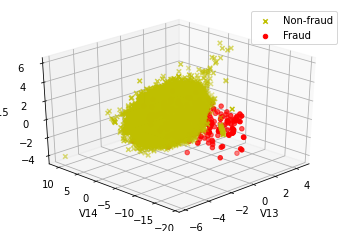

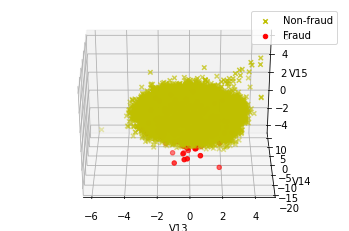

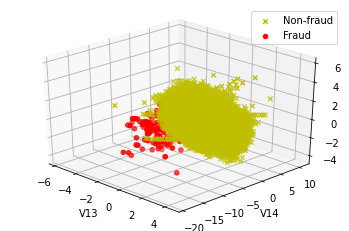

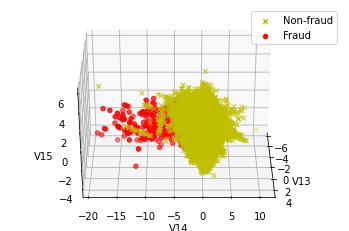

In [29]:
# Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles 
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=45)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=90)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=135)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=180)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=225)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=270)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=315)
plot_3d(X_train, y_train, f1="V13", f2="V14", f3="V15", angle=360)

In [30]:
AUC_T_score_3D,AUC_V_score_3D=0,0
Predicted_comp=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
Predicted_comp.fit(X_train[['V13','V14','V15']].values)
score_predicted_comp_T=Predicted_comp.score_samples(X_train[['V13','V14','V15']].values)
score_Val_predicted_comp_T=Predicted_comp.score_samples(X_val[['V13','V14','V15']].values)
AUC_T_score_3D=roc_auc_score(y_train,-1*score_predicted_comp_T)
AUC_V_score_3D=roc_auc_score(y_val,-1*score_Val_predicted_comp_T)
print(f'AUC train score is {AUC_T_score_3D} and AUC val score is {AUC_V_score_3D}')

AUC train score is 0.9488027115229458 and AUC val score is 0.9641966692023978


In [31]:
Final=[]
dic_thr={}
Score_Val=[]
Score_Train=[]
f1_list,threshold=[],[]
Predicted_comp.fit(X_train[['V13','V14','V15']].values)
score_Train_predicted_comp_T_3D=Predicted_comp.score_samples(X_train[['V13','V14','V15']].values)
score_Val_predicted_comp_T_3D=Predicted_comp.score_samples(X_val[['V13','V14','V15']].values)
for i in range(0,len(score_Val_predicted_comp_T_3D),100):
  random_threshold=sorted(score_Val_predicted_comp_T_3D)[i]
  threshold.append(random_threshold)
  f1=f1_score(y_val,score_Val_predicted_comp_T_3D < random_threshold)
  f1_list.append(f1)
thr1=threshold[f1_list.index(max(f1_list))]
f1_list,threshold=[],[]
dd=[thr1+x for x in range(-10,11)]
for x in dd:
  threshold.append(x)
  f1=f1_score(y_val,score_Val_predicted_comp_T_3D < x)
  f1_list.append(f1)
thr2=threshold[f1_list.index(max(f1_list))]
#print(thr2,max(f1_list))
threshold_value=round(thr2,3)
F1_value=round(max(f1_list),3)
print(f"The threshold is {threshold_value} and F1 values is {F1_value} ")

The threshold is -22.153 and F1 values is 0.621 


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **[0.5]**

In [32]:
### YOUR CODE HERE ###
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}

for FEAT in features:
  G1.fit(X_train_full[X_train_full['Class']==0][FEAT].values.reshape(-1,1))
  G2.fit(X_train_full[X_train_full['Class']==1][FEAT].values.reshape(-1,1))
  S1=G1.score_samples(X_val[FEAT].values.reshape(-1,1))
  S2=G2.score_samples(X_val[FEAT].values.reshape(-1,1))
  c_values,f1_values,prec_values,rcal_values=[],[],[],[]
  for c in np.arange(0,10,0.1):
    f1_S=f1_score(y_val,S1<S2*c)
    prec_S=precision_score(y_val,S1<S2*c,zero_division=0)
    rcal_S=recall_score(y_val,S1<S2*c)
    c_values.append(c)
    f1_values.append(f1_S)
    prec_values.append(prec_S)
    rcal_values.append(rcal_S)
  F1_values[FEAT]=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
  Precision_values[FEAT]=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
  Recall_values[FEAT]=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [33]:
Findings_validation=pd.DataFrame(data={'Features':F1_values.keys(),'C value validation':np.array(list(F1_values.values()))[:,1],
                                       'F1 score validation':np.array(list(F1_values.values()))[:,0],
                                       'Precision value validation':np.array(list(Precision_values.values()))[:,0],
                                       'Recall value validation':np.array(list(Recall_values.values()))[:,0]})

In [34]:
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}

for FEAT in features:
  G1.fit(X_train_full[X_train_full['Class']==0][FEAT].values.reshape(-1,1))
  G2.fit(X_train_full[X_train_full['Class']==1][FEAT].values.reshape(-1,1))
  S1=G1.score_samples(X_train[FEAT].values.reshape(-1,1))
  S2=G2.score_samples(X_train[FEAT].values.reshape(-1,1))
  c_values,f1_values,prec_values,rcal_values=[],[],[],[]
  for c in np.arange(0,10,0.1):
    f1_S=f1_score(y_train,S1<S2*c)
    prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
    rcal_S=recall_score(y_train,S1<S2*c)
    c_values.append(c)
    f1_values.append(f1_S)
    prec_values.append(prec_S)
    rcal_values.append(rcal_S)
  F1_values[FEAT]=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
  Precision_values[FEAT]=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
  Recall_values[FEAT]=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [35]:
Findings_validation['C value Train']=np.array(list(F1_values.values()))[:,1]
Findings_validation['F1 score Train']=np.array(list(F1_values.values()))[:,0]
Findings_validation['Precision value Train']=np.array(list(Precision_values.values()))[:,0]
Findings_validation['Recall value Train']=np.array(list(Recall_values.values()))[:,0]

In [36]:
Findings_validation

,Features,C value validation,F1 score validation,Precision value validation,Recall value validation,C value Train,F1 score Train,Precision value Train,Recall value Train
0,V1,6.5,0.132597,0.130435,0.134831,6.6,0.134111,0.131054,0.137313
1,V2,5.7,0.180000,0.818182,0.101124,4.6,0.154696,0.201923,0.125373
2,V3,7.6,0.310811,0.389831,0.258427,7.9,0.276636,0.370000,0.220896
3,V4,4.2,0.370370,0.350000,0.393258,4.2,0.358601,0.350427,0.367164
4,V5,8.4,0.170213,0.230769,0.134831,7.9,0.177936,0.220264,0.149254
5,V6,1.9,0.116279,0.078431,0.224719,1.8,0.106613,0.068875,0.235821
6,V7,7.9,0.230366,0.215686,0.247191,9.7,0.251572,0.265781,0.238806
7,V8,9.9,0.094118,0.098765,0.089888,9.7,0.077698,0.075000,0.080597
8,V9,3.4,0.456693,0.763158,0.325843,3.3,0.405983,0.714286,0.283582
9,V10,6.8,0.397260,0.508772,0.325843,8.0,0.420619,0.680000,0.304478


[6.5]


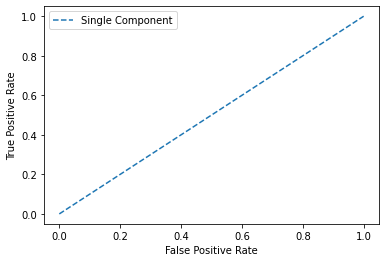

[5.7]


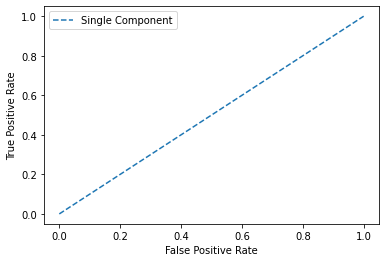

[7.6]


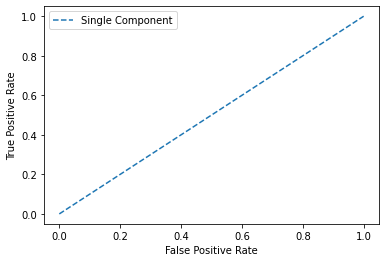

[4.2]


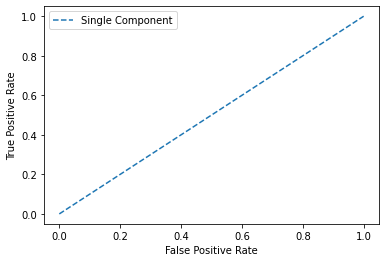

[8.4]


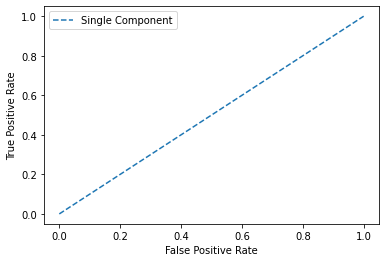

[1.9]


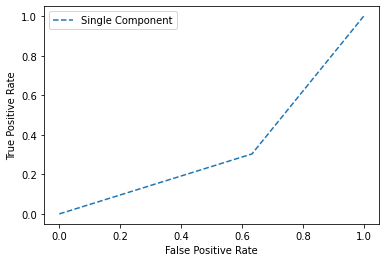

[7.9]


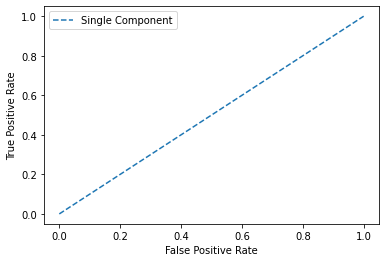

[9.9]


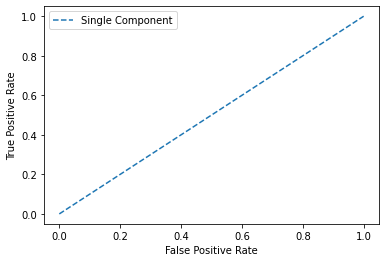

[3.4]


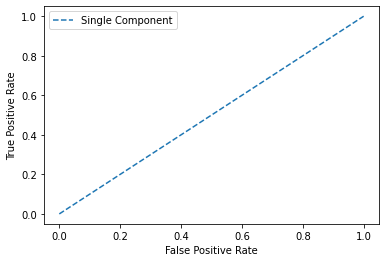

[6.8]


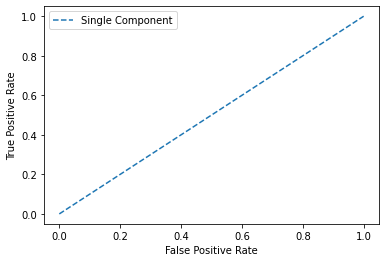

[3.6]


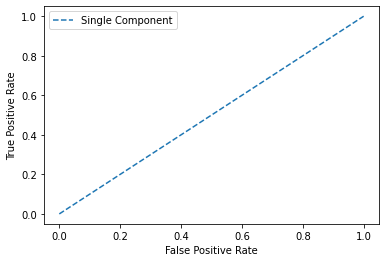

[4.4]


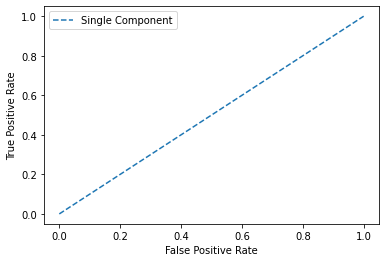

[1.1]


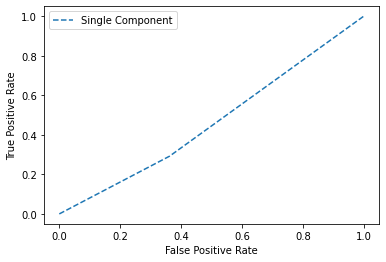

[7.]


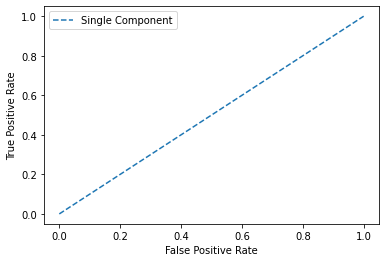

[1.2]


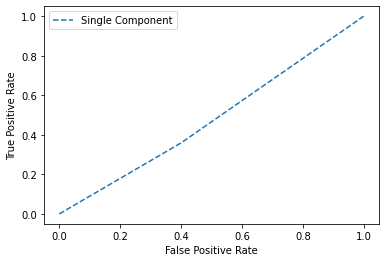

[5.2]


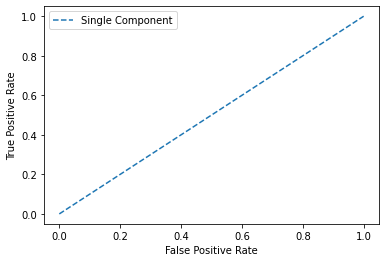

[5.9]


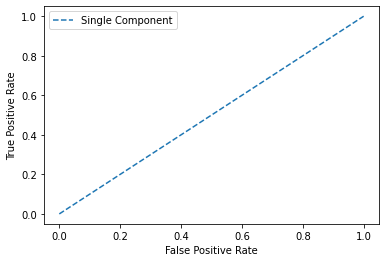

[4.4]


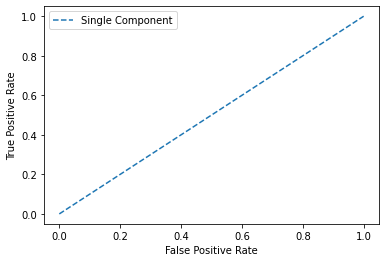

[3.2]


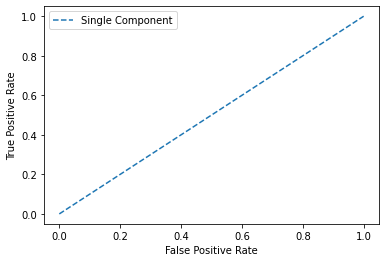

[1.6]


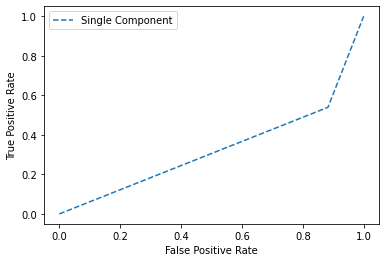

[9.9]


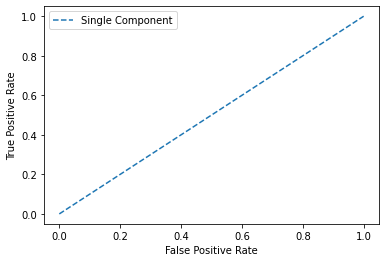

[3.2]


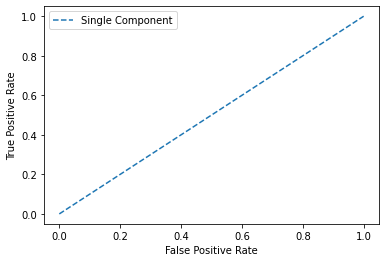

[3.9]


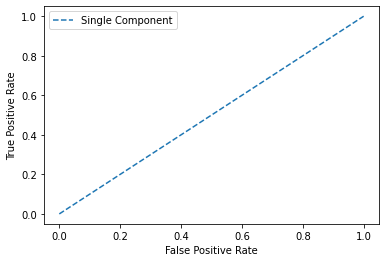

[1.9]


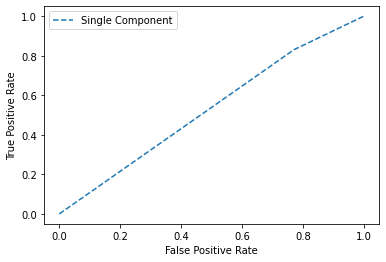

[1.8]


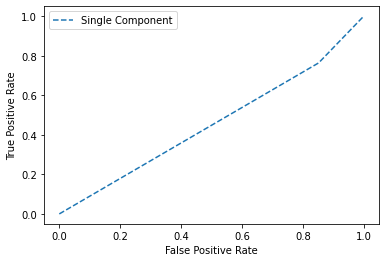

[1.1]


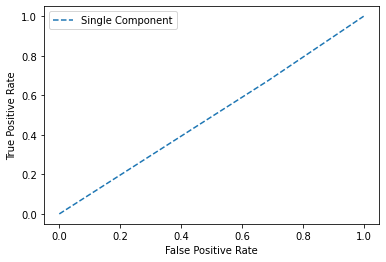

[3.1]


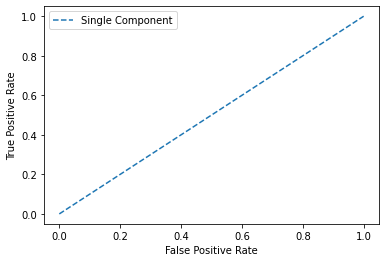

[1.9]


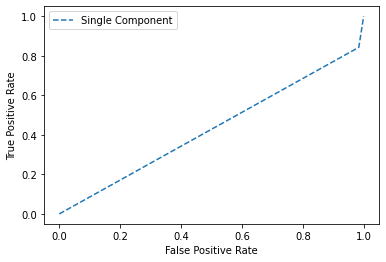

{'V1': 0.5, 'V2': 0.5, 'V3': 0.5, 'V4': 0.5, 'V5': 0.5, 'V6': 0.33522288705084546, 'V7': 0.5, 'V8': 0.5, 'V9': 0.5, 'V10': 0.5, 'V11': 0.5, 'V12': 0.5, 'V13': 0.46489914888709927, 'V14': 0.5, 'V15': 0.4795600847393002, 'V16': 0.5, 'V17': 0.5, 'V18': 0.5, 'V19': 0.5, 'V20': 0.3283245667712578, 'V21': 0.5, 'V22': 0.5, 'V23': 0.5, 'V24': 0.5298153395616843, 'V25': 0.45594442191838913, 'V26': 0.4940994263915677, 'V27': 0.5, 'V28': 0.429335402837167}


In [37]:
from sklearn.metrics import roc_curve
AUC_va={}
for feat in features:
  S1=G1.score_samples(X_val[feat].values.reshape(-1,1))
  S2=G2.score_samples(X_val[feat].values.reshape(-1,1))
  const=Findings_validation[Findings_validation['Features']==feat]['C value validation'].values
  print(const)
  fpr_sc, tpr_sc, _ = roc_curve(y_val, -1*(S1<S2*const)) # Labels: Valid=0, predictions: Valid = 1 --> need to multiply by -1
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()
  AUC_va[feat]=roc_auc_score(y_val,-1*(S1<S2*const))
print(AUC_va)

# **The AUC curves for the above plot depict that the model has no capability to distinguish. This is mostly due to the fact that we are using only a single feature to calculate the scores.**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

As the fraudulent data have been spread out and not concentrated at one point. Having more than a single component might help increase the score

In [38]:
#Model 1
for n in range(1,6):
  AUC_T_score,AUC_V_score=0,0
  Predicted_comp=GaussianMixture(n_components=n,covariance_type="full",random_state=0)
  Predicted_comp.fit(X_train[['V13','V14']].values)
  score_predicted_comp_T=Predicted_comp.score_samples(X_train[['V13','V14']].values)
  score_Val_predicted_comp_T=Predicted_comp.score_samples(X_val[['V13','V14']].values)
  AUC_T_score=roc_auc_score(y_train,-1*score_predicted_comp_T)
  AUC_V_score=roc_auc_score(y_val,-1*score_Val_predicted_comp_T)
  f1_list,threshold=[],[]
  print(f'AUC train score is {AUC_T_score} and AUC val score is {AUC_V_score}')
  for i in range(0,len(score_Val_predicted_comp_T),100):
    random_threshold=sorted(score_Val_predicted_comp_T)[i]
    threshold.append(random_threshold)
    f1=f1_score(y_val,score_Val_predicted_comp_T < random_threshold)
    f1_list.append(f1)
  thr1=threshold[f1_list.index(max(f1_list))]
  f1_list,threshold=[],[]
  dd=[thr1+x for x in range(-10,11)]
  for x in dd:
    threshold.append(x)
    f1=f1_score(y_val,score_Val_predicted_comp_T < x)
    f1_list.append(f1)
  thr2=threshold[f1_list.index(max(f1_list))]
  f1_=max(f1_list)
  print(f'The max f1 score {f1_}, and the threshold value is {thr2}, for n {n}')

AUC train score is 0.944796091130677 and AUC val score is 0.9669933358008662
The max f1 score 0.6368715083798883, and the threshold value is -19.05690593927315, for n 1
AUC train score is 0.9481328133015566 and AUC val score is 0.9698230165033321
The max f1 score 0.6242774566473989, and the threshold value is -11.648155184744573, for n 2
AUC train score is 0.9479017681270836 and AUC val score is 0.9682922780475739
The max f1 score 0.4867724867724868, and the threshold value is -9.404690675168256, for n 3
AUC train score is 0.9478295086098065 and AUC val score is 0.9693082754734037
The max f1 score 0.4867724867724868, and the threshold value is -10.315647054157822, for n 4
AUC train score is 0.9481409965374876 and AUC val score is 0.968453861162208
The max f1 score 0.47619047619047616, and the threshold value is -10.48329155640955, for n 5


In [82]:
#Model 2 (2 features)
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V17','V14']])
G2.fit(X_train_full[X_train_full['Class']==1][['V17','V14']])
S1=G1.score_samples(X_train[['V17','V14']])
S2=G2.score_samples(X_train[['V17','V14']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_train,S1<S2*c)
  prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_train,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V17','V14']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V17','V14']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V17','V14']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [83]:
print(F1_values,Precision_values,Recall_values)

{('V17', 'V14'): [0.7346938775510203, 7.2]} {('V17', 'V14'): [0.7748344370860927, 7.2]} {('V17', 'V14'): [0.6985074626865672, 7.2]}


In [85]:
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V17','V14']])
G2.fit(X_train_full[X_train_full['Class']==1][['V17','V14']])
S1=G1.score_samples(X_val[['V17','V14']])
S2=G2.score_samples(X_val[['V17','V14']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_val,S1<S2*c)
  prec_S=precision_score(y_val,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_val,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V17','V14']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V17','V14']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V17','V14']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [86]:
print(F1_values,Precision_values,Recall_values)

{('V17', 'V14'): [0.782608695652174, 7.6000000000000005]} {('V17', 'V14'): [0.875, 7.6000000000000005]} {('V17', 'V14'): [0.7078651685393258, 7.6000000000000005]}


In [87]:
# Model 3 (3 features and single component)
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_train[['V10','V14','V17']])
S2=G2.score_samples(X_train[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_train,S1<S2*c)
  prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_train,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [88]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.768987341772152, 5.9]} {('V10', 'V14', 'V17'): [0.8181818181818182, 5.9]} {('V10', 'V14', 'V17'): [0.7253731343283583, 5.9]}


In [89]:
# Model 4 (3 features and 2 components)
G1=GaussianMixture(n_components=2,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=2,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_train[['V10','V14','V17']])
S2=G2.score_samples(X_train[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_train,S1<S2*c)
  prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_train,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [90]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.7738095238095238, 3.5]} {('V10', 'V14', 'V17'): [0.771513353115727, 3.5]} {('V10', 'V14', 'V17'): [0.7761194029850746, 3.5]}


In [91]:
# Model 5 (3 features and 3 components)
G1=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_train[['V10','V14','V17']])
S2=G2.score_samples(X_train[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_train,S1<S2*c)
  prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_train,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [92]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.797583081570997, 2.7]} {('V10', 'V14', 'V17'): [0.8073394495412844, 2.7]} {('V10', 'V14', 'V17'): [0.7880597014925373, 2.7]}


In [113]:
G1=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_val[['V10','V14','V17']])
S2=G2.score_samples(X_val[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_val,S1<S2*c)
  prec_S=precision_score(y_val,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_val,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [114]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.8304093567251462, 2.8000000000000003]} {('V10', 'V14', 'V17'): [0.8658536585365854, 2.8000000000000003]} {('V10', 'V14', 'V17'): [0.797752808988764, 2.8000000000000003]}


0.9743977948438479


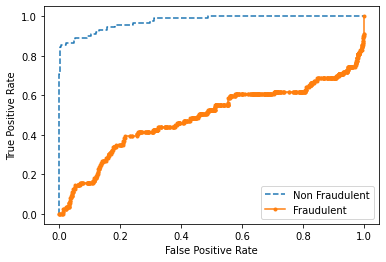

In [115]:
AUC_score=roc_auc_score(y_val,-1*S1)
print(AUC_score)
fpr_sc, tpr_sc, _ = roc_curve(y_val, -1 * S1)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * S2)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Non Fraudulent')
plt.plot(fpr_gm, tpr_gm, marker='.', label='Fraudulent')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [95]:
# Model 6 (3 features and 3 components fraudulent and 1 components for non-fraudulent)
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_train[['V10','V14','V17']])
S2=G2.score_samples(X_train[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_train,S1<S2*c)
  prec_S=precision_score(y_train,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_train,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [96]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.7765089722675367, 6.800000000000001]} {('V10', 'V14', 'V17'): [0.8561151079136691, 6.800000000000001]} {('V10', 'V14', 'V17'): [0.7104477611940299, 6.800000000000001]}


In [97]:
G1=GaussianMixture(n_components=1,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_val[['V10','V14','V17']])
S2=G2.score_samples(X_val[['V10','V14','V17']])
c_values,f1_values,prec_values,rcal_values=[],[],[],[]
for c in np.arange(0,50,0.1):
  f1_S=f1_score(y_val,S1<S2*c)
  prec_S=precision_score(y_val,S1<S2*c,zero_division=0)
  rcal_S=recall_score(y_val,S1<S2*c)
  c_values.append(c)
  f1_values.append(f1_S)
  prec_values.append(prec_S)
  rcal_values.append(rcal_S)
F1_values['V10','V14','V17']=[max(f1_values),c_values[f1_values.index(max(f1_values))]]
Precision_values['V10','V14','V17']=[prec_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]]
Recall_values['V10','V14','V17']=[rcal_values[f1_values.index(max(f1_values))],c_values[f1_values.index(max(f1_values))]] 

In [98]:
print(F1_values,Precision_values,Recall_values)

{('V10', 'V14', 'V17'): [0.8275862068965517, 5.4]} {('V10', 'V14', 'V17'): [0.8470588235294118, 5.4]} {('V10', 'V14', 'V17'): [0.8089887640449438, 5.4]}


# **If we look at the above models the best f1 score is achieved using 3 features and n_component equal to 3. Hence we shall proceed with Model 5 for Part6**

## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


In [108]:
### YOUR CODE HERE ###
G1=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
G2=GaussianMixture(n_components=3,covariance_type="full",random_state=0)
X_train_full=X_train.copy()
X_train_full['Class']=y_train
F1_values,Precision_values,Recall_values={},{},{}


G1.fit(X_train_full[X_train_full['Class']==0][['V10','V14','V17']])
G2.fit(X_train_full[X_train_full['Class']==1][['V10','V14','V17']])
S1=G1.score_samples(X_test[['V10','V14','V17']])
S2=G2.score_samples(X_test[['V10','V14','V17']])
f1_S=f1_score(y_test,S1<S2*2.8000000000000003)
prec_S=precision_score(y_test,S1<S2*2.8000000000000003)
rcal_S=recall_score(y_test,S1<S2*2.8000000000000003)
print(f"The f1 score is {f1_S}, the precision score is {prec_S}, and the recall score is {rcal_S}")

The f1 score is 0.8405797101449276, the precision score is 0.8285714285714286, and the recall score is 0.8529411764705882


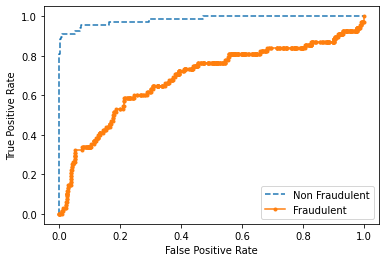

In [110]:
fpr_sc, tpr_sc, _ = roc_curve(y_test, -1 * S1)
fpr_gm, tpr_gm, _ = roc_curve(y_test, -1 * S2)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Non Fraudulent')
plt.plot(fpr_gm, tpr_gm, marker='.', label='Fraudulent')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()